# Module 10 Application

## Challenge: Crypto Clustering

In this Challenge, you’ll combine your financial Python programming skills with the new unsupervised learning skills that you acquired in this module.

The CSV file provided for this challenge contains price change data of cryptocurrencies in different periods.

The steps for this challenge are broken out into the following sections:

* Import the Data (provided in the starter code)
* Prepare the Data (provided in the starter code)
* Find the Best Value for `k` Using the Original Data
* Cluster Cryptocurrencies with K-means Using the Original Data
* Optimize Clusters with Principal Component Analysis
* Find the Best Value for `k` Using the PCA Data
* Cluster the Cryptocurrencies with K-means Using the PCA Data
* Visualize and Compare the Results

### Import the Data

This section imports the data into a new DataFrame. It follows these steps:

1. Read  the “crypto_market_data.csv” file from the Resources folder into a DataFrame, and use `index_col="coin_id"` to set the cryptocurrency name as the index. Review the DataFrame.

2. Generate the summary statistics, and use HvPlot to visualize your data to observe what your DataFrame contains.


> **Rewind:** The [Pandas`describe()`function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) generates summary statistics for a DataFrame. 

In [19]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# import and load .env file
from dotenv import load_dotenv
load_dotenv()

True

In [20]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    Path("Resources/crypto_market_data.csv"),
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [21]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [22]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

This section prepares the data before running the K-Means algorithm. It follows these steps:

1. Use the `StandardScaler` module from scikit-learn to normalize the CSV file data. This will require you to utilize the `fit_transform` function.

2. Create a DataFrame that contains the scaled data. Be sure to set the `coin_id` index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.


In [23]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)

In [24]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

# plot new data frame
# Plot your data to see what's in your DataFrame
df_market_data_scaled.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Find the Best Value for k Using the Original Data

In this section, you will use the elbow method to find the best value for `k`.

1. Code the elbow method algorithm to find the best value for `k`. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of `k` to visually identify the optimal value for `k`.

3. Answer the following question: What is the best value for `k`?

In [25]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


k = list(range(1,11))

In [26]:
# Create an empy list to store the inertia values

inertia = []

In [27]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters =i, random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)
    
print(f"The length of k is {len(k)}")
print(f"The length of inertia is {len(inertia)}")

# pop inertia items
if len(inertia) > len(k):
    inertia.pop()


C:\Users\ramgo\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


The length of k is 10
The length of inertia is 10


In [28]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# review df_elbow
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


In [29]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xlabel="Number of Clusters",
    ylabel="Inertia"
)

:Curve   [k]   (inertia)

#### Answer the following question: What is the best value for k?
**Question:** What is the best value for `k`?

**Answer:** # k =4 ist at elbow so is best value

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In this section, you will use the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to the price changes of cryptocurrencies provided.

1. Initialize the K-Means model with four clusters using the best value for `k`. 

2. Fit the K-Means model using the original data.

3. Predict the clusters to group the cryptocurrencies using the original data. View the resulting array of cluster values.

4. Create a copy of the original data and add a new column with the predicted clusters.

5. Create a scatter plot using hvPlot by setting `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. Color the graph points with the labels found using K-Means and add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

In [30]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [31]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

# print intermediate data used in model

# Print the centroids
print(model.cluster_centers_)

# Print the labels assigned to each data point
print(model.labels_)

# Print the inertia value of the model
print(model.inertia_)


[[-4.98104189 -0.04517829 -1.20695612 -1.21212587  0.04773554  4.63238025
   6.08862545]
 [ 0.03258562 -0.56998841 -0.4827023  -0.25453208 -0.07913767 -0.18795807
  -0.18203893]
 [ 1.04553034 -0.61832816  2.90705393  5.35145461  4.76991278  3.14887546
   1.34848839]
 [ 0.23756041  1.19101578  0.83462785  0.19065425 -0.212313   -0.22264199
  -0.20800783]]
[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]
79.02243535120975


In [32]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_predict = model.predict(df_market_data_scaled)

# View the resulting array of cluster values.
display(k_predict)

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [33]:
# Create a copy of the DataFrame
df_market_data_predictions = df_market_data_scaled.copy()

In [34]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_predictions['clusters_elbow'] = k_predict

# Display sample data
display(df_market_data_predictions)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters_elbow
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,3
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,3
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,3


In [72]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
original_scatter = df_market_data_predictions.hvplot(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters_elbow",
    kind="scatter",
    hover_cols=["coin_id"],
    title="Cryptocoin Data with Clusters (elbow k)"
)

In [36]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_200d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_predictions.hvplot(
    x="price_change_percentage_200d",
    y="price_change_percentage_24h",
    by="clusters_elbow",
    kind="scatter",
    hover_cols=["coin_id"],
    title="Cryptocoin Data with Clusters (elbow k)"
)

:NdOverlay   [clusters_elbow]
   :Scatter   [price_change_percentage_200d]   (price_change_percentage_24h,coin_id)

---

### Optimize Clusters with Principal Component Analysis

In this section, you will perform a principal component analysis (PCA) and reduce the features to three principal components.

1. Create a PCA model instance and set `n_components=3`.

2. Use the PCA model to reduce to three principal components. View the first five rows of the DataFrame. 

3. Retrieve the explained variance to determine how much information can be attributed to each principal component.

4. Answer the following question: What is the total explained variance of the three principal components?

5. Create a new DataFrame with the PCA data. Be sure to set the `coin_id` index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.

In [39]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

# Fit the model to the data and transform the data
pca_data = pca_model.fit_transform(df_market_data_predictions)

# review 5 rows of data
pca_data[::5]

array([[-1.58513942,  0.13439444,  0.545621  ],
       [-1.97548441,  0.52821869,  0.67014519],
       [ 1.34482218, -1.10867868, -1.07691211],
       [-0.86215465, -0.75748831,  1.49064702],
       [ 0.88787177, -0.9471738 , -0.58814236],
       [ 0.24612771, -0.54095727, -0.80998208],
       [ 0.22204295, -0.81706832,  0.1223472 ],
       [ 0.23485616,  0.22344816, -1.39010339],
       [ 0.39392642, -0.44954511, -0.98855636]])

In [38]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
print(pca_model.explained_variance_ratio_)


[0.37005408 0.32322221 0.19115222]


#### Answer the following question: What is the total explained variance of the three principal components?

**Question:** What is the total explained variance of the three principal components?

**Answer:** adding the sum of all three principal components listed above - the total explained variance is 88.4%.

In [57]:
# Create a new DataFrame with the PCA data.
crypto_pca_df = pd.DataFrame(pca_data, columns=["PCA1", "PCA2", "PCA3"])

# Creating a DataFrame with the PCA data
#df_crypto_pca["coin_id"] = df_market_data_predictions.index

# Copy the crypto names from the original data
# YOUR CODE HERE!

# Set the coinid column as index
# YOUR CODE HERE!

# Display sample data
crypto_pca_df.head()

,PCA1,PCA2,PCA3
0,-1.585139,0.134394,0.545621
1,-1.322581,0.054494,1.115709
2,0.266335,-0.536409,-0.796946
3,0.257225,-0.592013,-0.646529
4,-2.952250,0.422372,1.267894


---

### Find the Best Value for k Using the PCA Data

In this section, you will use the elbow method to find the best value for `k` using the PCA data.

1. Code the elbow method algorithm and use the PCA data to find the best value for `k`. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of `k` to visually identify the optimal value for `k`.

3. Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?

In [58]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_pca = list(range(1,11))

In [59]:
# Create an empy list to store the inertia values
k_inertia =[]

In [60]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
# Create a new DataFrame without the `coin_id` column
#df_crypto_pca_numeric = df_crypto_pca.drop("coin_id", axis=1)


# Create a for loop to compute the inertia with each possible value of k
for i in k_pca:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(crypto_pca_df)
    k_inertia.append(model.inertia_)


C:\Users\ramgo\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


In [61]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k,
    "inertia": k_inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [62]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)
elbow_plot_pca

:Curve   [k]   (inertia)

#### Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The elbow for PCA data is at 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** They are both same. The elbow curve for the PCA data is more defined than that of original data.

---

### Cluster Cryptocurrencies with K-means Using the PCA Data

In this section, you will use the PCA data and the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to the principal components.

1. Initialize the K-Means model with four clusters using the best value for `k`. 

2. Fit the K-Means model using the PCA data.

3. Predict the clusters to group the cryptocurrencies using the PCA data. View the resulting array of cluster values.

4. Add a new column to the DataFrame with the PCA data to store the predicted clusters.

5. Create a scatter plot using hvPlot by setting `x="PC1"` and `y="PC2"`. Color the graph points with the labels found using K-Means and add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

In [63]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [64]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca_df)

KMeans(n_clusters=4)

In [65]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_pca_clusters = model.predict(crypto_pca_df)

# View the resulting array of cluster values.
print(crypto_pca_clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [66]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_df_copy = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_df_copy = pd.DataFrame(crypto_pca_df_copy, columns=["PCA1", "PCA2", "PCA3"])

# Display sample data
display(crypto_pca_df_copy)

,PCA1,PCA2,PCA3
0,-1.585139,0.134394,0.545621
1,-1.322581,0.054494,1.115709
2,0.266335,-0.536409,-0.796946
3,0.257225,-0.592013,-0.646529
4,-2.952250,0.422372,1.267894
5,-1.975484,0.528219,0.670145
6,-1.671906,0.178423,2.718598
7,-1.539740,0.324517,1.497226
8,-1.347533,-0.132837,0.791063
9,0.040698,-0.802083,-0.465562


In [76]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Add a class column with the labels
crypto_pca_df_copy["customer_segments"] = crypto_pca_clusters

pca_elbow_plot= crypto_pca_df_copy.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="customer_segments"
)

---

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

1. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the Elbow Curve that you created to find the best value for `k` with the original and the PCA data.

2. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the cryptocurrencies clusters using the original and the PCA data.

3. Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

> **Rewind:** Back in Lesson 3 of Module 6, you learned how to create composite plots. You can look at that lesson to review how to make these plots; also, you can check [the hvPlot documentation](https://holoviz.org/tutorial/Composing_Plots.html).

In [82]:
# Composite plot to contrast the Elbow curves
composite_elbow_plot = original_scatter + pca_elbow_plot

In [83]:
# Compoosite plot to contrast the clusters
composite_elbow_plot

:Layout
   .NdOverlay.I  :NdOverlay   [clusters_elbow]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [customer_segments]
      :Scatter   [PCA1]   (PCA2)

#### Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** # The clusters are most distinctly visible.

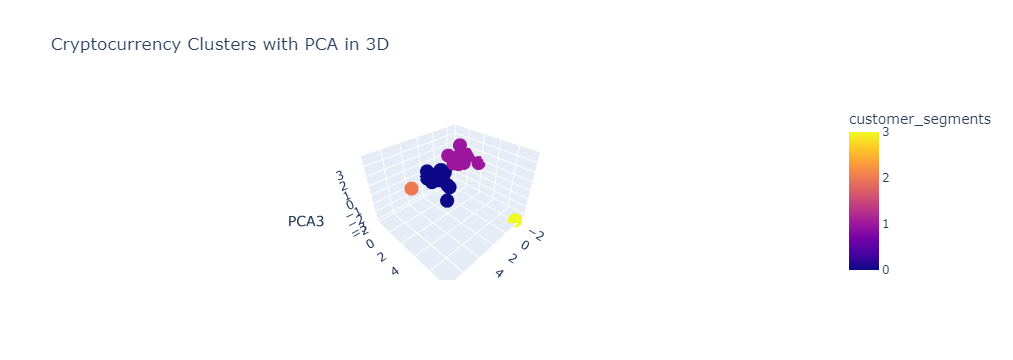

In [84]:
# try to plot all three PCA components in a 3D scatter plot.


import plotly.express as px

fig = px.scatter_3d(
    crypto_pca_df_copy, 
    x='PCA1', 
    y='PCA2', 
    z='PCA3', 
    color='customer_segments', 
    title='Cryptocurrency Clusters with PCA in 3D'
)

fig.show()

# it also shows 4 distinct clusters.
